<a href="https://colab.research.google.com/github/Idaogah/datalab/blob/main/Investigation_of_Employee_Attrition_Problems_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INVESTIGATION OF EMPLOYEE ATTRITION PROBLEMS USING MACHINE LEARNING ALGORITHM [THESIS]
- This study use machine learning techniques to investigate the cause of attrition without conducting exit interviews or tracking former employees.

- The goal is to find out why people voluntarily leave their employment and what elements influence their decision to leave.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

To download the datasets for the reasearch, click [here](https://drive.google.com/file/d/14o7zu-exhAC0O2PVu0mvaIgZ7Nl8EDZq/view?usp=sharing) and [here](https://drive.google.com/file/d/1_CsWwLXA-AQgemSONhtU11RBHMRCf8mn/view?usp=sharing).

In [ ]:
# _importing pandas library
# _loading CSV files

import pandas as pd

present_emp = pd.read_csv('present_emp.csv')

past_emp = pd.read_csv('past_emp.csv')

emp_dataset = pd.concat([past_emp, present_emp])

display(emp_dataset)

,EmpID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,high,0
11424,14208,0.74,0.95,5,266,10,0,1,management,high,0
11425,14209,0.85,0.54,3,185,10,0,1,management,high,0
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high,0


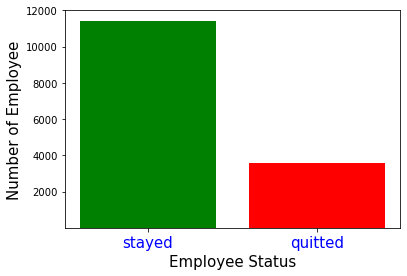

In [ ]:
# _importing NumPy
# _visualizing present and past employee

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

status_count = emp_dataset.groupby('status').count()

plt.bar(status_count.index.values, status_count['salary'], color=['green', 'red', 'blue'])

plt.yticks(ticks=range(2000, 13000, 2000))
plt.xticks(ticks=[0, 1], labels=['stayed', 'quitted'], fontsize=15,color='blue')

plt.xlabel('Employee Status', fontsize=15)
plt.ylabel('Number of Employee', fontsize=15)
plt.show()

In [ ]:
# Dataset Exploration and Examination

display(emp_dataset.head())
display(emp_dataset.info())

,EmpID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  status                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


None

In [ ]:
# Basic summary
total_observations = len(emp_dataset)


print(emp_dataset.status.value_counts()/total_observations*100)
print('0=present employee, 1=past employee')

0    76.191746
1    23.808254
Name: status, dtype: float64
0=present employee, 1=past employee


In [ ]:
# Data cleaning and tranformation

#emp_dataset = emp_dataset.drop('EmpID',axis=1)
clean_data = emp_dataset.drop('EmpID', axis=1)



# _Observiving categorical variable

# display(emp_dataset.salary.unique())
# display(emp_dataset.dept.unique())

# Transforming salary to catgorical variable
clean_data.salary = clean_data.salary.astype('category')

# Setting the order of the category
clean_data.salary = clean_data.salary.cat.reorder_categories(['low', 'medium' ,'high'])

# Encoding categories with integer values
clean_data.salary = clean_data.salary.cat.codes

display(clean_data.salary.unique())


array([0, 1, 2], dtype=int8)

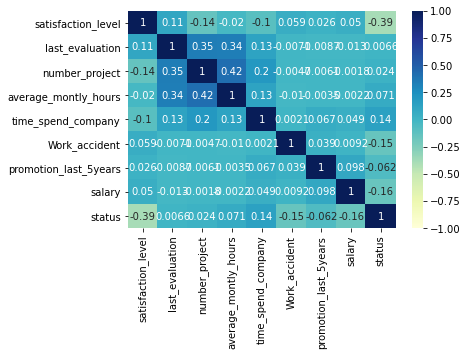

<Figure size 576x1152 with 0 Axes>

In [ ]:
# Finding the correlation between the variables

import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = clean_data.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu", vmin=-1, vmax=1, annot=True)
plt.figure(figsize=(8, 16))
#plt.yticks(ticks=[x / 10 for x in range(0, 10)])

plt.show()

In [ ]:


# Getting department dummies
departments = pd.get_dummies(clean_data.dept)
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(departments.sum())

IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


In [ ]:
# Dummy trapping of the department data frame
# by removing one column from the dummy
dept_without_technical = departments.drop("technical", axis = 1)

# Removing previous "dept" column from the dataset
transform_clean_data = clean_data.drop("dept", axis = 1)

# Joing the dept_without_technical into the main dataset
transform_clean_data = transform_clean_data.join(dept_without_technical)
transform_clean_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,status,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,1,0
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,1,0
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,0,1,0
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,1,0,0,0,0,0,0,0,1,0


In [ ]:
# Setting the dependent column (status) as target

target = transform_clean_data.status

# Setting all other columns as features
features = transform_clean_data.drop("status",axis=1)


In [ ]:
# Train/test split
# train - the component used to develop the model
# test - the component used to validate the model

from sklearn.model_selection import train_test_split

target_train, target_test = train_test_split(target, test_size=0.25,random_state=22)
features_train, features_test = train_test_split(features, test_size=0.25,random_state=22)


In [ ]:
# importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=22)

# fitting features with target samples
model.fit(features_train, target_train)

#model.fit(features_test, target_test)

# Check the accuracy score of the prediction for the training sample
print('train set accuracy: ', model.score(features_train, target_train)*100)

# Check the accuracy score of the prediction for the test sample
print('test set accuracy: ', model.score(features_test,target_test)*100)

train set accuracy:  100.0
test set accuracy:  98.59104046242774


In [ ]:
# Importing tree visualization function

from sklearn.tree import export_graphviz

# Applying decision tree to fit model
model.fit(features_train,target_train)

# Exporting the tree to a dot file
export_graphviz(model,"tree.dot")


In [ ]:
# Overfitting control
# by limiting max tree depth:
# by limiting min sample size on a leaf:

fitted_sample = DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=22)

# Fit the model
fitted_sample.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print("train accuracy = ", fitted_sample.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print("test accuracy = ", fitted_sample.score(features_test,target_test)*100)



train accuracy =  96.38060825052695
test accuracy =  96.3150289017341


In [ ]:
# Importing precision score library

from sklearn.metrics import precision_score

# Predicting whether employee will leave or not using test sample
prediction = model.predict(features_test)

# Calculating precision score
# by comparing target_test with the prediction

precision_score(target_test, prediction)

0.971830985915493

In [ ]:
# Importing recall score library

from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculating recall_score
# by comparing target_test with the prediction

recall_score(target_test, prediction)

0.9857142857142858

In [ ]:
# Importing ROC/AUC score

from sklearn.metrics import roc_auc_score

# predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculating ROC/AUC score
# by comparing target_test with the prediction

roc_auc_score(target_test, prediction)

0.9858603721359372

In [ ]:
# Initialize the DecisionTreeClassifier

model_depth_6_b = DecisionTreeClassifier(
    max_depth=6,class_weight="balanced",random_state=22)

# Fit the model
model_depth_6_b.fit(features_train,target_train)

# Print the percentage accuracy of the prediction
print('percentage accuracy: ', model_depth_6_b.score(features_test,target_test)*100)

percentage accuracy:  93.84031791907515


In [ ]:
# Comparing balance and imbalance model values

# Print the recall score
print('recall score: ', recall_score(target_test, prediction))

# Print the ROC/AUC score
print('ROC/AUC score: ', roc_auc_score(target_test, prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7, class_weight="balanced", random_state=22)

# Fit it to the training component
model_depth_7_b.fit(features_train, target_train)

# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)

# Print the recall score for the balanced model
print('recall score for the balanced model: ', recall_score(target_test, prediction_b))

# Print the ROC/AUC score for the balanced model
print('ROC/AUC score for the balanced model: ', roc_auc_score(target_test, prediction_b))


recall score:  0.9857142857142858
ROC/AUC score:  0.9858603721359372
recall score for the balanced model:  0.9417582417582417
ROC/AUC score for the balanced model:  0.9669770756692178


In [ ]:
# implementing cross validation

from sklearn.model_selection import cross_val_score

# print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98374718 0.99141825 0.96251129 0.95709124 0.95573622 0.97741644
 0.98148148 0.98780488 0.99909666 0.99503162]


In [ ]:
# Setting up GridSearch parameters

# Generating values for maximum_depth
depth = [i for i in range(5,21,1)]

# Generating values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [ ]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize GridSearchCV function,
# the param_search function,
# model and parameters
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)


# print the best parameters found
print(param_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 50}


In [ ]:
# Calculation features importance using model best parameters

model_best = DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=22)
model_best.fit(features_train, target_train)

# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(
    index=feature_list, data=feature_importances, columns=["Importance"])

# renaming index as Feature
relative_importances = relative_importances.rename_axis('Feature').reset_index()


# assign percentages importance
relative_importances["Percentage"] = relative_importances["Importance"]*100

# Sort values to learn most important features
relative_importances.sort_values(by="Importance", ascending=False)

,Feature,Importance,Percentage
0,satisfaction_level,0.534446,53.444627
4,time_spend_company,0.307453,30.745259
1,last_evaluation,0.087300,8.730015
3,average_montly_hours,0.044046,4.404633
2,number_project,0.026739,2.673896
7,salary,0.000016,0.001570
11,hr,0.000000,0.000000
15,sales,0.000000,0.000000
14,product_mng,0.000000,0.000000
13,marketing,0.000000,0.000000


In [ ]:
# selecting  features with importance greater than 1%
selected_features = relative_importances[relative_importances.Importance>0.01]

# Sorting values selected_features
selected_features.sort_values(by="Importance", ascending=False)

# create a list from those features
selected_list = selected_features.Feature


# transform both features_train and features_test
# components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]


In [ ]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(
    max_depth=8, min_samples_leaf=150, class_weight="balanced", random_state=22)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print("accuracy = ", model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print("recall score = ", recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print("ROC/AUC score = ", roc_auc_score(target_test, prediction_best) * 100)

accuracy =  95.55635838150289
recall score =  92.14285714285714
ROC/AUC score =  94.68552975549746


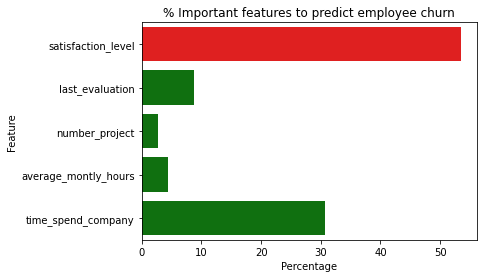

In [ ]:
# Visualizing selected_features
#selected_features.Feature    // index = Feature
#selected_features.Importance
#selected_features.Percentage

values = selected_features.Percentage
idx = selected_features.Feature
plt.figure(figsize=(6,4))
clrs = ['green' if (x < max(values)) else 'red' for x in values]
sns.barplot(y=idx,x=values,palette=clrs).set(
    title='% Important features to predict employee churn')
plt.show()

In [ ]:
cat_totals = transform_clean_data.groupby("time_spend_company")["status"].sum().sort_values(ascending=False)
selected_features

,Feature,Importance,Percentage
0,satisfaction_level,0.534446,53.444627
1,last_evaluation,0.087300,8.730015
2,number_project,0.026739,2.673896
3,average_montly_hours,0.044046,4.404633
4,time_spend_company,0.307453,30.745259


In [ ]:
#importing Python module
from sklearn.cluster import KMeans

#Filtering the data
left_attrition_Status =  transform_clean_data[['satisfaction_level', 'last_evaluation']][transform_clean_data.status == 1]

# Creating groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 22).fit(left_attrition_Status)
print(kmeans)

KMeans(n_clusters=3, random_state=22)


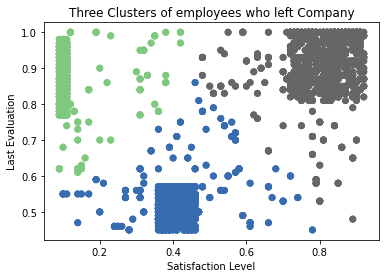

In [ ]:


left_attrition_Status['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_attrition_Status['satisfaction_level'], left_attrition_Status['last_evaluation'], c=left_attrition_Status['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Three Clusters of employees who left Company')
plt.show()